# 확률 분포 튜토리얼

- 이 튜토리얼은 아래 DataCamp 링크 튜토리얼을 번역해주신 송호연님의 글입니다.
- [DataCamp](https://www.datacamp.com/community/tutorials/probability-distributions-python)

- [송호연님 브런치 사이트](https://brunch.co.kr/@chris-song/90)

이 튜토리얼에서는 기계 학습 문헌에서 일반적으로 사용되는 확률 분포에 대해 학습한다.

> ### 소개
 확률 및 통계는 데이터 과학의 기본 축입니다. 실제로 기계 학습과 인공 지능의 근본 원리는 통계 수학과 선형 대수학 뿐입니다. 종종 데이터 과학에서 특정 주제를 이해하기 위해 많은 수학을 필요로하는 연구 논문을 읽어야하는 상황에 직면하게 됩니다. 따라서 데이터 과학을 더 잘 이해하려면 기본에 대한 강점을 지니는 것이 중요합니다. 수학적 이해. 이 튜토리얼은 기계 학습 문헌에 일반적으로 사용되는 확률 분포에 관한 것입니다. 초보자의 경우 시작하기에 적합한 튜토리얼입니다. 이 자습서에서는 다음을 수행할 것입니다.
 - 확률 변수, 밀도 곡선, 확률 함수 등과 같은 확률 전문 용어에 대해 배웁니다.
 - 다양한 확률 분포와 그 분포 함수와 그 속성 중 일부에 대해 배웁니다.
 - 이 확률 분포를 파이썬으로 작성하는 방법을 배웁니다.

> 확률 변수

확률 변수는 가능한 값이 임의의 현상의 수치적 결과인 변수입니다. 무작위 변수는 이산 형과 연속 형의 두 가지 유형이 있습니다. 이산 확률 변수는 셀 수 있는 고유 값을 취할 수 있으므로 수량화 할 수 있습니다. 예를 들어 무작위 변수 X를 공정한 주사위를 굴릴 때 나타나는 숫자로 정의할 수 있습니다. X는 [1,2,3,4,5,6]값을 취할 수 있으므로 이산 확률 변수입니다. 이산 확률 변수의 확률 분포는 가능한 각 값과 관련된 확률의 목록입니다. 확률 함수 또는 확률 질량 함수라고도 합니다. 수학적으로 생각하기 위해서, 임의의 변수 X가 k개의 다른 값을 취할 수 있고, $X=x_i$가 $P(X=x_i)=p_i$로 정의 될 확률을 가정합니다. 그런 다음 확률$p_i$는 다음을 만족해야 합니다.

- $0<p_i<1$ for each $i$
- $p_1+p_2+\dots+p_k=1$

이산 확률 분포의 몇가지 예는 베르누이 분포, 이항 분포, 푸아송 분포 등입니다. 연속 확률 변수는 무한한 수의 가능한 값을 취하는 변수입니다. 예를 들어, 임의 변수 X를 클래스의 학생 높이로 정의 할 수 있습니다. 연속 확률 변수는 값의 간격에 대해 정의되므로 곡선 아래 영역(또는 적분)으로 나타냅니다. 확률 분포 함수로 알려진 연속 확률 변수의 확률 분포는 연속 값을 취하는 함수입니다. 확률 변수에 의해 가정 될 수 있는 값의 수가 무한하기 때문에 임의의 단일 값을 관측 할 확률은 0입니다. 예를 들어, 확률 변수 X는 실수의 간격에 걸쳐 모든 값을 취할 수 있습니다. 그러면 X가 결과 집합 A, P(A)에 있을 확률은 A보다 커지고 곡선 아래의 영역으로 정의됩니다. 함수 p(x)를 나타내는 곡선은 다음을 만족해야 합니다.
- 1. 곡선에는 음수 값이 없다. 즉 모든 x에 대해 p(x)>0
- 2. 곡선 아래의 총 면적은 1이다.


이러한 요구 사항을 충족시키는 곡선을 흔히 확률 밀도 곡선이라고 합니다. 연속 확률 분포의 예로는 정규 분포, 지수 분포, 베타 분포등이 있습니다.

누적 분포 함수에 대해 알아야 할 문학에서 종종 나타나는 또 다른 유형의 분포가 있습니다. 모든 확률 변수(이산 및 연속)에는 누적 분포 함수가 있습니다. 확률 변수 X가 모든 값 x에 대해 x보다 작거나 같을 확률을 제공하는 함수입니다. 이산 확률 변수의 경우 누적 분포 함수는 확률을 합산하여 구합니다. 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
# latext 표현식을 위해
from IPython.display import Math, Latex
# 이미지 표시를 위해
from IPython.core.display import Image
import warnings
warnings.filterwarnings('ignore')

In [10]:
import seaborn as sns
# seaborn plotting style 설정
sns.set(color_codes=True)
# seaborn plot size 설정
sns.set(rc={'figure.figsize':(5,5)})

> 균일 분포 (Uniform distribution)
 
 
  아마 가장 간단하고 유용한 분포 중 하나는 균일 분포일 것입니다. 연속적인 균일 분포의 확률 분포 함수는 다음과 같습니다.

동일한 너비의 수의 모든 간격은 동일한 확률로 관찰되므로 분포를 설명하는 곡선은 간격을 가로 질러 일정한 높이와 다른 것에 높이가 0인 직사각형이다. 곡선 아래의 영역이 1이어야 하므로 간격의 길이가 곡선의 높이를 결정하게 된다. 간격(a,b)의 균일한 분포가 있을 때 면적은 1이어야하기 때문에 높이는 1/(b-a)로 설정된다.

[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

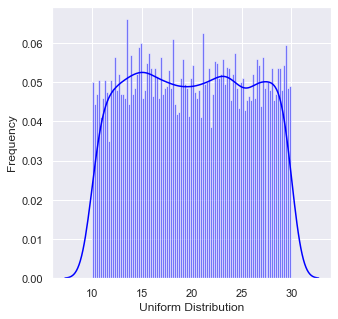

In [11]:
#import uniform distribution
from scipy.stats import uniform
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
ax = sns.distplot(data_uniform,
                 bins=100,
                 kde=True,
                 color='blue',
                 hist_kws={"linewidth":1, 'alpha':0.5})
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

> 정규 분포 (Normal Distribution)

가우시안 분포라고도 알려진 정규 분포는 데이터 과학에서 언제 어디서나 쓰인다. 특히 통계적 추론을 주제로 여러 곳에서 만나게 될 것이다. 많은 데이터 과학 알고리즘 가정 중 하나이다.

정규 분포는 평균과 표준 편차로 나타낸 종 모양의 밀도 곡선을 가진다. 밀도 곡선은 그 평균$\mu$을 중심으로 대칭이며, 그 표준 편차 $\sigma$에 의해 결정되는 확산은 평균 근처의 데이터가 평균 $\mu$보다 멀리 떨어진 데이터보다 발생 빈도가 더 높다는 것을 보여준다. 주어진 점 x에서 평균 $\mu$과 표준 편차 $\sigma$를 갖는 정규 밀도 곡선의 확률 분포 함수는 다음과 같이 주어진다.

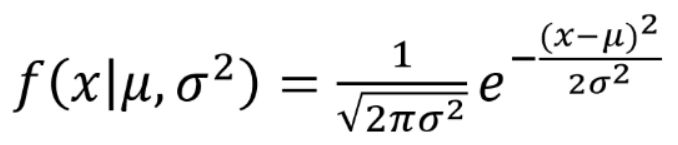

다음은 확률 분포가 어떻게 보이는지 설명하는 그림이다.

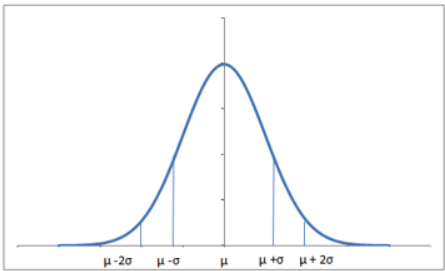

거의 68%의 데이터가 두 표준 편차 내에서 한쪽 표준 편차와 95% 거리 사이에 있다. 또한 평균 0과 표준 편차 1을 갖는 분포를 표준 정규 분포라고 부른다.

scipy.stats 모듈의 norms.rvs() 메소드를 사용하여 정상적으로 분산 된 확률 변수를 생성할 수 있다. loc 인수는 분포의 평균에 해당하며 scale은 표준 편차 및 크기를 무작위 수의 수에 대응한다. 재현성을 유지하려면 숫자에 할당 된 random_state 인수를 포함시키면 된다.

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

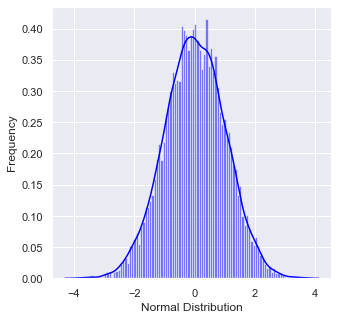

In [12]:
from scipy.stats import norm
# N(0,1) 정규분포에서 임의의 숫자들을 생성합니다
data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.distplot(data_normal,
                 bins=100,
                 kde=True,
                 color='blue',
                 hist_kws={"linewidth":1, 'alpha':0.5})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

> 감마 분포 (Gamma Distribution)

감마 분포는 두 개의 연속적인 확률 분포 family이다. 원시 형태에서는 거의 사용되지 않지만, 지수, 카이 제곱, 얼랑 분포와 같이 널리 사용되는 다른 분포는 감마 분포의 특수한 경우이다. 감마 분포는 속도 매개 변수라 불리는 형상 파라미터 $\alpha = k$ 및 역 스케일 파라미터 $\beta = 1/\theta$의 관점에서 매개 변수화 될 수 있다. 

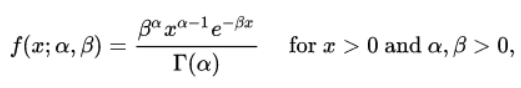

[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

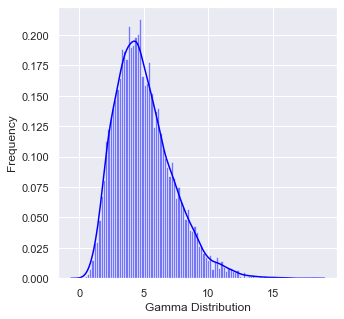

In [14]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.distplot(data_gamma,
                 kde=True,
                 bins=100,
                 color='blue',
                 hist_kws={"linewidth":1, "alpha":0.5})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

a가 정수인 경우 감마는 Erlang 분포로 감소하고 a가 1일 땐 지수 분포로 감소한다. 분산을 사용하기 위해 loc 인수를 사용하며 size는 분포에서 임의 변량의 수를 결정한다.

> 지수 분포 (Exponential Distribution)

지수 분포는 푸아송 포인트 프로세스에서의 이벤트 간의 시간, 즉 일정한 평균 속도로 이벤트가 연속적이고 독립적으로 발생하는 프로세스를 설명한다. 여기에는 rate 매개 변수라는 매개변수 $\lambda$가 있으며 그 방정식은 다음과 같이 설명된다.

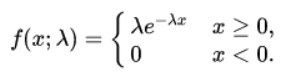

감소하는 지수 분포는 다음과 같다.

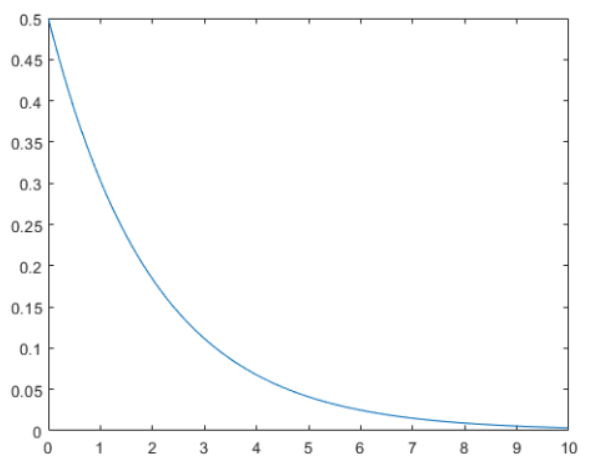

scipy.stats 모듈의 expon.rvs()메소드를 사용하여 기하 급수적으로 분산 된 무작위 변수를 생성할 수 있다. 이 메소드는 형상 매개 변수 스케일을 인자로 취한다. 이 인자는 방정식에서 $1/\lambda$ 이외의 것이다. 분포를 이동하려면 loc인수를 사용하고, size는 분포에서 임의의 변량의 수를 결정한다.

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

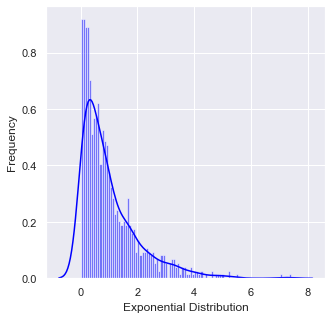

In [15]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon,
                 kde=True,
                 bins=100,
                 color='blue',
                 hist_kws={"linewidth":1,"alpha":0.5})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

> 푸아송 분포 (Poisson Distribution)

푸아송 확률 변수는 일반적으로 시간 간격에서 이벤트가 발생한 횟수를 모델링하는 데 사용된다. 예를 들어 일정 기간 동안 웹 사이트에서 방문한 사용자의 수는 푸아송 프로세스로 생각할 수 있다. 푸아송 분포는 이벤트가 발생하는 비율($\mu$)로 설명된다. 이벤트는 일정한 간격으로 0,1,2,...번 발생할 수 있다. 일정 간격의 평균 이벤트 수는 $\lambda$로 지정된다. 람다는 rate매개 변수라고도 하는 이벤트 속도이다. 일정 기간 동안 k개의 이벤트를 관측 할 확률은 다음 방정식에 의해 주어진다

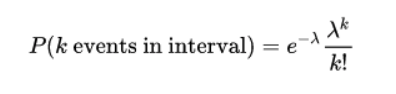

정규 분포는 $\lambda\to \infty$의 매개 변수를 갖는 푸아송 분포의 제한적인 경우이다. 또한 임의의 사건들 사이의 시간이 비율 $\lambda$의 지수 분포를 따른다면 길이 t의 시간주기에서의 총 사건 수는 파라미터 $\lambda t$를 가진 포아송 분포를 따른다.

다음 그림은 일반적인 푸아송 분포를 보여준다

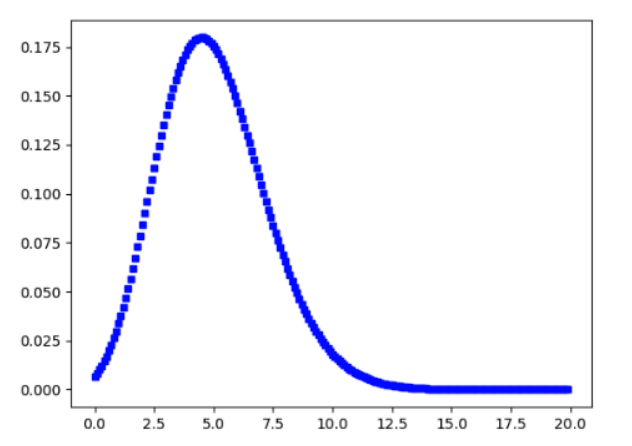

scipy.stats 모듈의 poisson.rvs() 메서드를 사용하여 포아송 분산 이산 무작위 변수를 생성할 수 있다. 이 메서드는 $\mu$ 모양 매개 변수로 사용하며 방정식의 $\lambda$에 불과하다. 분포를 이동하려면 loc을 사용한다. 크기는 분포에서의 임의의 변량의 수를 결정한다.

[Text(0.5, 0, 'Poission Distribution'), Text(0, 0.5, 'Frequency')]

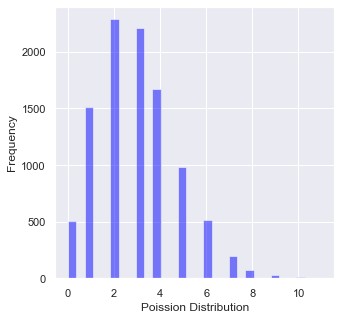

In [16]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                 bins=30,
                 kde=False,
                 color='blue',
                 hist_kws={'linewidth':1, 'alpha':0.5})
ax.set(xlabel='Poission Distribution', ylabel='Frequency')

> 이항 분포 (Binomial Distribution)

성공 또는 실패, 이익 또는 손실, 성공 도는 실패 확률 모든 시도에 대해 동일한 확률이 같은 두가지 결과만이 가능한 배포를 이항 분포라고 한다. 그러나 결과가 똑같이 나타날 필요는 없으며 각 시험을 독립적이다. 이항 분포의 매개 변수는 n과 p이며 여기서 n은 총 시행 횟수이고, p는 각 시행의 성공 확률이다. 확률 분포 함수는 다음과 같이 주어진다.

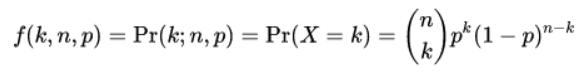

shape 매개 변수로 n과 p를 사용하는 scipy.stats 모듈의 binorm.rvs() 메서드를 사용하여 이항 분산 이산 무작위 변수를 생성할 수 있다. 분포를 이동하려면 loc 매개 변수를 사용한다. 크기는 재판을 반복 할 횟수를 결정한다.

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

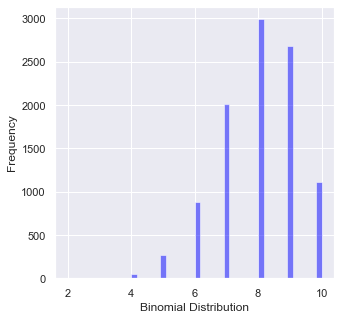

In [17]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)
ax = sns.distplot(data_binom,
                 kde=False,
                 color='blue',
                 hist_kws={'linewidth':1, 'alpha':0.5})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

성공확률을 0.8로 설정했기 때문에 분포가 오른쪽으로 기울어져 있다. 또한 포아송 분포는 다음 조건에서 이항 분포의 제한적인 경우이다. 

1. 시도 횟수는 무한대이거나 $n\to\infty$
2. 각 시도에 대한 성공 확률은 동일하고 무한히 작거나 $p\to0$이다
3. np=$lambda$는 유한이다.

정규 분포는 다음 조건에서 이항 분포의 다른 제한적인 형태이다.

1. 시행의 횟수는 무한대로 n$\to\infty$이다
2. p와 q 둘 다 무한히 작지 않다.

> 베르누이 분포(Bernoulli Distribution)

베르누이 분포는 1과 0의 두 가지 가능한 결과와 단일 시행만 있다. 따라서 베르누이 분포를 갖는 무작위 변수 X는 성공 확률 p와 실패 확률 q 또는 1-p로 값 0을 취할 수 있다. 성공과 실패의 확률은 똑같이 높을 필요는 없다. 베르누이 분포는 단일 시험이 수행되는 이항 분포의 특별한 경우이다(n=1). 확률 질량 함수는 다음과 같이 주어진다. 
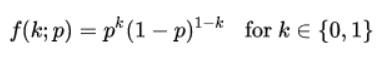

p 매개 변수 (성공 확률)를 모양 매개 변수로 사용하는 scipy.stats 모듈의 bernoulli.rvs() 메서드를 사용하여 bernoulli 분산 불연속 무작위 변수를 생성 할 수 있다. 분포를 이동하려면 loc 매개 변수를 사용한다. 크기는 재판을 반복할 횟수를 결정한다. 

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

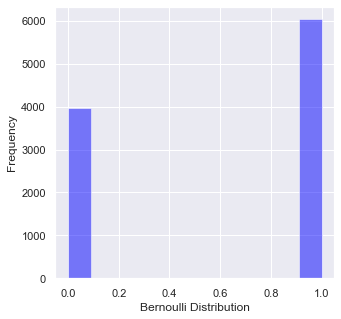

In [18]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)
ax = sns.distplot(data_bern,
                 kde=False,
                 color='blue',
                 hist_kws={'linewidth':1,'alpha':0.5})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

즉 이렇게 분포를 가시화하면 가능한 결과는 두 가지뿐임을 알 수 있다.